In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%matplotlib inline

# Sorting

Sorting in Pandas is extremely easy. There are two important methods to be used for `Series` and `DataFrame`s that will take care of the job: `sort_index` and `sort_values`.

Let's start with `Series`, which are the most intuitive ones:

In [2]:
s = pd.Series(np.random.randint(100, size=10))
s

0    73
1    77
2    17
3    19
4     9
5    87
6    78
7    50
8    83
9    75
dtype: int64

In [3]:
s.sort_values()

4     9
2    17
3    19
7    50
0    73
9    75
1    77
6    78
8    83
5    87
dtype: int64

In [4]:
s.sort_values(ascending=False)

5    87
8    83
6    78
1    77
9    75
0    73
7    50
3    19
2    17
4     9
dtype: int64

As you can see, sorting is as simple as invoking the `sort_values` method. By default, values are sorted in ascending order, which you can customize with the `ascending` parameter. Indexes can also be sorted:

In [5]:
timestamps = np.random.randint(
    int((datetime.now() - timedelta(hours=5)).timestamp()),
    int(datetime.now().timestamp()),
    size=10
)
timestamps

array([1523393585, 1523379538, 1523382584, 1523384397, 1523392745,
       1523381164, 1523384072, 1523383620, 1523383507, 1523380713])

In [6]:
index = pd.to_datetime(timestamps, unit='s')
index

DatetimeIndex(['2018-04-10 20:53:05', '2018-04-10 16:58:58',
               '2018-04-10 17:49:44', '2018-04-10 18:19:57',
               '2018-04-10 20:39:05', '2018-04-10 17:26:04',
               '2018-04-10 18:14:32', '2018-04-10 18:07:00',
               '2018-04-10 18:05:07', '2018-04-10 17:18:33'],
              dtype='datetime64[ns]', freq=None)

In [7]:
s = pd.Series(
    np.random.randint(500, 550, size=10),
    index=index
)
s

2018-04-10 20:53:05    536
2018-04-10 16:58:58    520
2018-04-10 17:49:44    507
2018-04-10 18:19:57    515
2018-04-10 20:39:05    543
2018-04-10 17:26:04    503
2018-04-10 18:14:32    518
2018-04-10 18:07:00    501
2018-04-10 18:05:07    506
2018-04-10 17:18:33    513
dtype: int64

In [8]:
s.sort_index()

2018-04-10 16:58:58    520
2018-04-10 17:18:33    513
2018-04-10 17:26:04    503
2018-04-10 17:49:44    507
2018-04-10 18:05:07    506
2018-04-10 18:07:00    501
2018-04-10 18:14:32    518
2018-04-10 18:19:57    515
2018-04-10 20:39:05    543
2018-04-10 20:53:05    536
dtype: int64

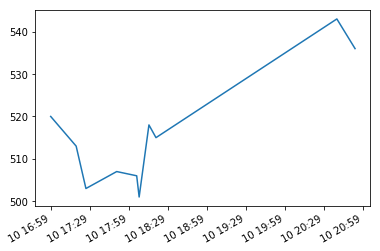

In [9]:
s.sort_index().plot()

### Sorting DataFrames

Sorting `DataFrame`s is equally as simple, using both the `sort_values` and `sort_index` methods:

In [10]:
df = pd.DataFrame(
    np.random.randint(100, size=(10, 4)),
    columns=['Column %s' % i for i in ('A', 'B', 'C', 'D')],
    index=index
)
df

,Column A,Column B,Column C,Column D
2018-04-10 20:53:05,90,75,74,1
2018-04-10 16:58:58,60,55,14,20
2018-04-10 17:49:44,13,98,11,76
2018-04-10 18:19:57,58,75,82,44
2018-04-10 20:39:05,16,58,20,69
2018-04-10 17:26:04,58,49,76,90
2018-04-10 18:14:32,76,72,28,17
2018-04-10 18:07:00,14,44,70,15
2018-04-10 18:05:07,39,13,83,73
2018-04-10 17:18:33,39,7,37,58


`sort_index` works exactly in the same way:

In [11]:
df.sort_index()

,Column A,Column B,Column C,Column D
2018-04-10 16:58:58,60,55,14,20
2018-04-10 17:18:33,39,7,37,58
2018-04-10 17:26:04,58,49,76,90
2018-04-10 17:49:44,13,98,11,76
2018-04-10 18:05:07,39,13,83,73
2018-04-10 18:07:00,14,44,70,15
2018-04-10 18:14:32,76,72,28,17
2018-04-10 18:19:57,58,75,82,44
2018-04-10 20:39:05,16,58,20,69
2018-04-10 20:53:05,90,75,74,1


In [12]:
df.sort_index(inplace=True)

We need a few duplicate values to explain multiple-column sorting later:

In [13]:
df.iloc[2:6, 0] = 99

In [14]:
df

,Column A,Column B,Column C,Column D
2018-04-10 16:58:58,60,55,14,20
2018-04-10 17:18:33,39,7,37,58
2018-04-10 17:26:04,99,49,76,90
2018-04-10 17:49:44,99,98,11,76
2018-04-10 18:05:07,99,13,83,73
2018-04-10 18:07:00,99,44,70,15
2018-04-10 18:14:32,76,72,28,17
2018-04-10 18:19:57,58,75,82,44
2018-04-10 20:39:05,16,58,20,69
2018-04-10 20:53:05,90,75,74,1


In [15]:
df.sort_values('Column B')

,Column A,Column B,Column C,Column D
2018-04-10 17:18:33,39,7,37,58
2018-04-10 18:05:07,99,13,83,73
2018-04-10 18:07:00,99,44,70,15
2018-04-10 17:26:04,99,49,76,90
2018-04-10 16:58:58,60,55,14,20
2018-04-10 20:39:05,16,58,20,69
2018-04-10 18:14:32,76,72,28,17
2018-04-10 18:19:57,58,75,82,44
2018-04-10 20:53:05,90,75,74,1
2018-04-10 17:49:44,99,98,11,76


In [16]:
df.sort_values(by=['Column A', 'Column D'])

,Column A,Column B,Column C,Column D
2018-04-10 20:39:05,16,58,20,69
2018-04-10 17:18:33,39,7,37,58
2018-04-10 18:19:57,58,75,82,44
2018-04-10 16:58:58,60,55,14,20
2018-04-10 18:14:32,76,72,28,17
2018-04-10 20:53:05,90,75,74,1
2018-04-10 18:07:00,99,44,70,15
2018-04-10 18:05:07,99,13,83,73
2018-04-10 17:49:44,99,98,11,76
2018-04-10 17:26:04,99,49,76,90
